In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
boston_dataset = load_boston()

In [3]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [4]:
len(boston_dataset.feature_names)

13

### 特徵：'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston["MEDV"] = boston_dataset.target

### 目標變量："MEDV"是希望預測的變量

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
prices = boston['MEDV']
features = boston.drop('MEDV', axis = 1)

In [10]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 房屋總價分佈

(array([ 0.00658762,  0.00219587,  0.0153711 ,  0.0153711 ,  0.00658762,
         0.01317523,  0.01756697,  0.02195872,  0.01756697,  0.05050505,
         0.03293808,  0.04172156,  0.0307422 ,  0.03513395,  0.03952569,
         0.06148441,  0.07905138,  0.06368028,  0.07246377,  0.06148441,
         0.08124726,  0.04611331,  0.03293808,  0.00878349,  0.0153711 ,
         0.02415459,  0.01976285,  0.01976285,  0.01097936,  0.0153711 ,
         0.0153711 ,  0.01756697,  0.00439174,  0.01756697,  0.01097936,
         0.00878349,  0.00439174,  0.00219587,  0.00219587,  0.        ,
         0.00439174,  0.00439174,  0.00439174,  0.00439174,  0.00439174,
         0.00219587,  0.00219587,  0.        ,  0.00658762,  0.03513395]),
 array([  5. ,   5.9,   6.8,   7.7,   8.6,   9.5,  10.4,  11.3,  12.2,
         13.1,  14. ,  14.9,  15.8,  16.7,  17.6,  18.5,  19.4,  20.3,
         21.2,  22.1,  23. ,  23.9,  24.8,  25.7,  26.6,  27.5,  28.4,
         29.3,  30.2,  31.1,  32. ,  32.9,  33.8,  34.7

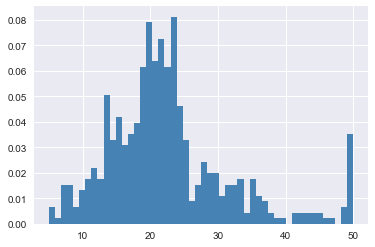

In [11]:
plt.hist(boston['MEDV'], bins=50, color='steelblue', normed=True )

In [12]:
X = boston.loc[:,"CRIM":"LSTAT"].values
Y = boston.MEDV
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0) 
model = LinearRegression()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)

### 原有的圖表

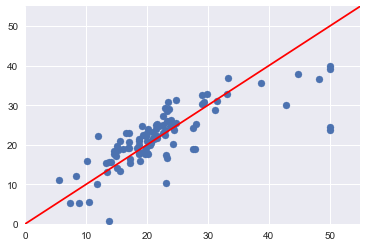

In [13]:
plt.scatter(Y_test , Y_predict)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.plot([0,55],[0,55], c="r")

### 畫出各個特徵與MEDV的圖 - 分析特徵與MEDV的關係

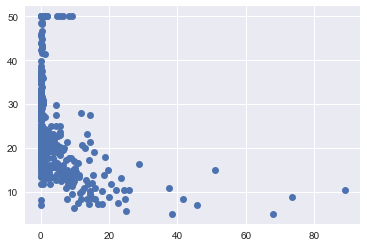

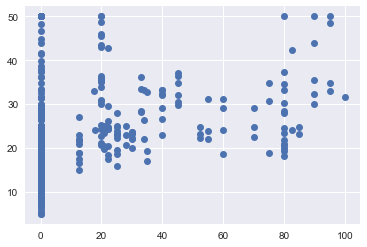

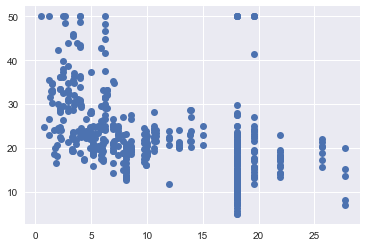

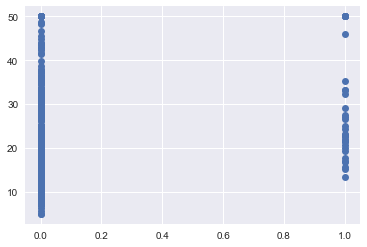

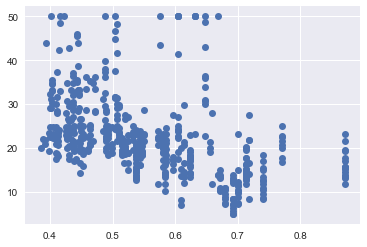

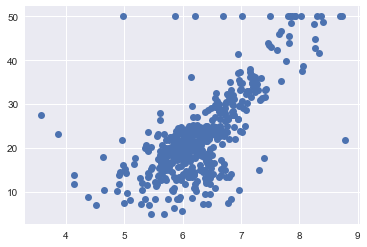

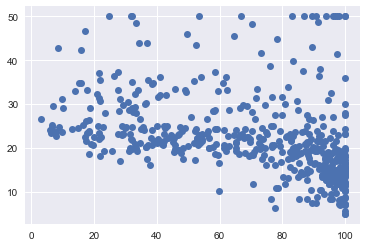

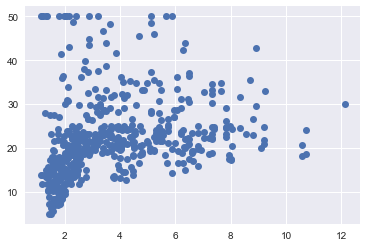

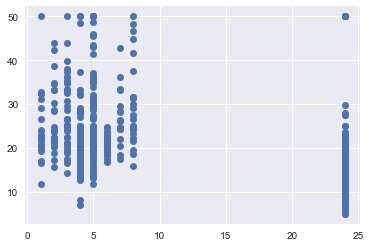

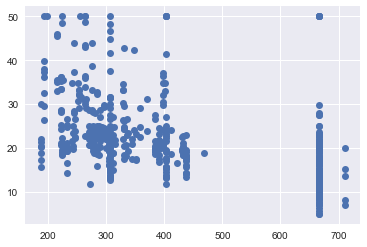

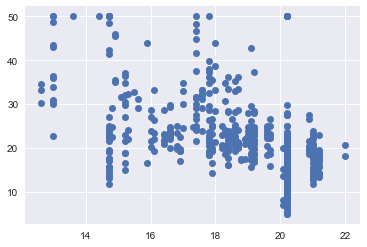

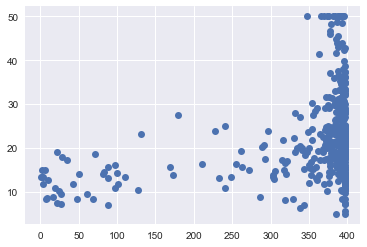

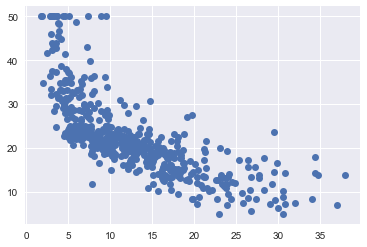

In [14]:
def draw(x,y):
    plt.plot(x,y,'o')
#     plt.xlabel()
#     plt.ylabel()
    plt.show()
draw(boston['CRIM'],boston['MEDV'])
draw(boston['ZN'],boston['MEDV'])
draw(boston['INDUS'],boston['MEDV'])
draw(boston['CHAS'],boston['MEDV'])
draw(boston['NOX'],boston['MEDV'])
draw(boston['RM'],boston['MEDV'])
draw(boston['AGE'],boston['MEDV'])
draw(boston['DIS'],boston['MEDV'])
draw(boston['RAD'],boston['MEDV'])
draw(boston['TAX'],boston['MEDV'])
draw(boston['PTRATIO'],boston['MEDV'])
draw(boston['B'],boston['MEDV'])
draw(boston['LSTAT'],boston['MEDV'])

### 熱力圖查看相關性

In [15]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


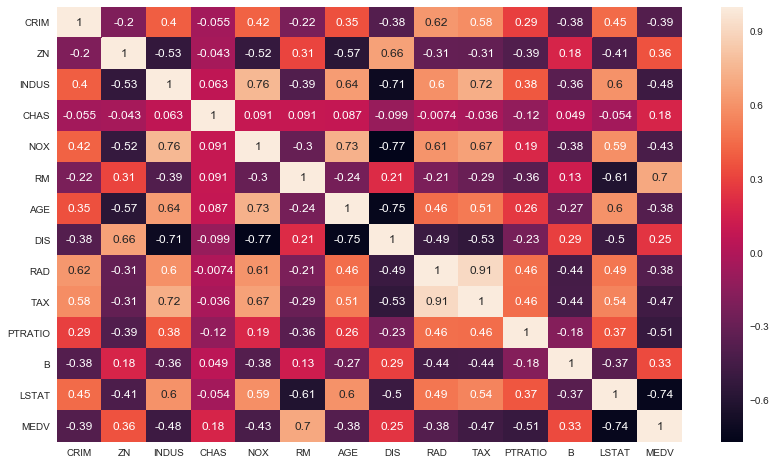

In [16]:
cor = boston.corr()
plt.figure(figsize=(14,8))
sns.heatmap(cor,annot=True)

### 刪掉一些features - 刪掉+-0.3以內的

In [17]:
boston = boston.drop(['CHAS','DIS'], axis =1)

In [18]:
A = boston.loc[:,"CRIM":"LSTAT"].values
B = boston.MEDV

In [19]:
A_train, A_test, B_train, B_test = train_test_split(A,B,test_size=0.2, random_state=0) 
model = LinearRegression()
model.fit(A_train, B_train)
B_predict = model.predict(A_test)

### 新圖表

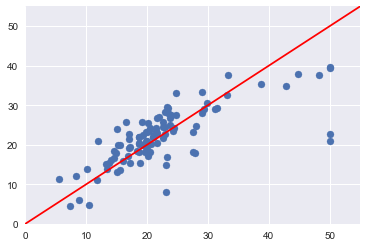

In [20]:
sns.set()
plt.scatter(B_test , B_predict)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.plot([0,55],[0,55], c="r")